In [56]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
print(iris.data.shape)
print(np.cov(iris.data,rowvar=False))

(150, 4)
[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]


1. Write a Python function that calculates the covariance matrix

In [57]:
x=np.random.randint(1,10,size=(5,3))


In [58]:

# Covariance by column
A=x-x.mean(axis=0)
c=A.T.dot(A)/(x.shape[0]-1)
#
print(c)
print(np.cov(x,rowvar=False))



[[ 4.8  -0.95  2.9 ]
 [-0.95  3.8   2.9 ]
 [ 2.9   2.9   6.7 ]]
[[ 4.8  -0.95  2.9 ]
 [-0.95  3.8   2.9 ]
 [ 2.9   2.9   6.7 ]]


2.	Implement a function pca(X, d, whitening=False) that performs PCA on the input data X and returns the projected (and optionally whitened) data Y, the matrix of eigenvectors V, and the eigenvalues Lambda. For the eigenvector decomposition you can use the function np.linalg.eigh.


In [59]:
#Eigenvalues, Eigenmatrix
eigVals,eigVects=np.linalg.eig(np.mat(c))


In [60]:
for n in range(1,100):
# Sorting feature values from smallest to largest
 eigValIndice=np.argsort(eigVals)            
# subscript of the largest n eigenvalues
 n_eigValIndice=eigValIndice[-1:-(n+1):-1]  
# Eigenvectors corresponding to the largest n eigenvalues 
 n_eigVect=eigVects[:,n_eigValIndice]
 #Data in low-dimensional feature space 
 lowDDataMat=c*n_eigVect
 #reconstructed data
 reconMat=(lowDDataMat*n_eigVect.T)+c
 # and return

Und zusammen

In [61]:

def zeroMean(x):      
    A=np.mean(x,axis=0)     
    c=x-A
    return c,A

def pca(x,d, whitening=False):
    newData,meanVal=zeroMean(x)
    covMat=np.cov(newData,rowvar=0)  
    eigVals,eigVects=np.linalg.eig(np.mat(covMat))
    eigValIndice=np.argsort(eigVals)            
    n_eigValIndice=eigValIndice[-1:-(d+1):-1]   
    n_eigVect=eigVects[:,n_eigValIndice]        
    lowDDataMat=newData*n_eigVect               
    reconMat=(lowDDataMat*n_eigVect.T)+meanVal  
    return lowDDataMat,reconMat,eigVals,eigVects


3.Project the Iris data onto a two-dimensional feature space. Create scatter plots visualizing the projected data points before and after applying whitening.

In [65]:
import matplotlib.pyplot as plt
x_true = datasets.load_iris().data.astype("float64")
y_true = datasets.load_iris().target.reshape(-1, 1).astype("float64")


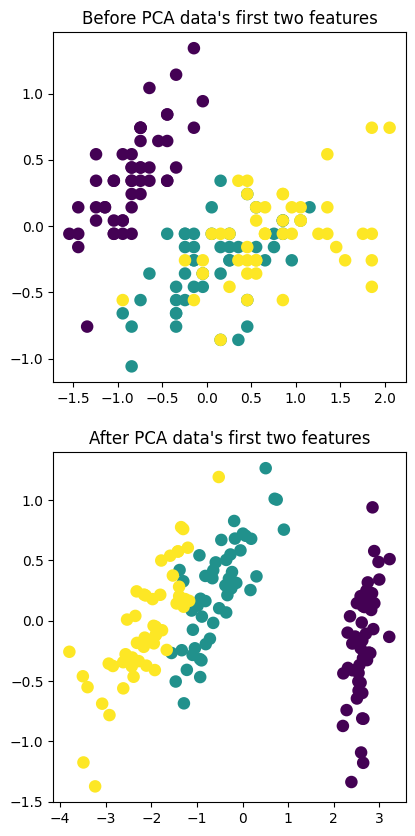

In [68]:


# Before PCA data's first two features
plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.title("Before PCA data's first two features")
plt.scatter(x_true[:, 0], x_true[:, 1], 
			c= y_true.reshape(y_true.shape[0], ), lw= 3)


def PCA_DATA(x_true):
    x_true -= np.mean(x_true, axis=0)
    cov = np.dot(x_true.T, x_true) / x_true.shape[0]
    U, S, V = np.linalg.svd(cov)
    x_true_rot = np.dot(x_true, U)
    return x_true_rot
x_true_rot = PCA_DATA(x_true)

# After PCA data's first two features
plt.subplot(223)
plt.title("After PCA data's first two features")
plt.scatter(x_true_rot[:, 0], x_true_rot[:, 1], 
			c= y_true.reshape(y_true.shape[0], ), lw= 3)


plt.show()


